### Project Title: Classification Project
#### Done By: 
#### Data Engineers:

- Lizaan Botha
- Susheila Naick
- Amukelani Khosa
- Lutho Ntsepe
- Richard Marais
- Thabiso Nyokolodi

© ExploreAI 2024

---
# Trello board : https://trello.com/invite/b/673b84b9d1cd7a9a14707eae/ATTI118b6ec773775dde7036453f1aaad0bc53A594A3/classification-project
# Github Repo : https://github.com/LizaanB/2401PTDS_Classification_Project.git
---
## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [3]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [4]:
! pip install mlflow

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [5]:
#Read the data
df=pd.read_csv('test.csv')
df=pd.read_csv('train.csv')

#Get shape and head
shape = df.shape
print(f"shape of the dataset: {shape} \n")

df.head(10)

shape of the dataset: (5520, 5) 



,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business
5,"India’s Russian oil imports slip in Oct, Saudi...",Russian crude accounted for nearly 35 per cent...,India’s oil imports from Russia averaged 1.57 ...,https://indianexpress.com/article/business/com...,business
6,Neelkanth Mishra appointed part-time chairpers...,The board of the UIDAI comprises a chairperson...,"Neelkanth Mishra, chief economist at Axis Bank...",https://indianexpress.com/article/business/eco...,business
7,Centre issues advisory to social media platfor...,The IT ministry had earlier also issued adviso...,The Ministry of Electronics and IT (MeitY) has...,https://indianexpress.com/article/business/cen...,business
8,Asian shares rise after eased pressure on bond...,US futures were little changed and oil prices ...,"Shares advanced Wednesday in Asia, tracking Wa...",https://indianexpress.com/article/business/wor...,business
9,India’s demand for electricity for ACs to exce...,India's demand for electricity for running hou...,nrIndia’s demand for electricity for running h...,https://indianexpress.com/article/business/eco...,business


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

Steps for Data Cleaning and Filtering
Handle Missing Values:

- Replace missing values with appropriate substitutes (e.g., mean or median for numerical columns, mode for categorical columns).

Remove Outliers:

- Identify and remove outliers that can skew the analysis.

Correct Errors:

- Ensure data is accurate and consistent. For example, ensure dates and numerical values are in the correct format.

Data Reduction:

- Filter the data based on certain criteria or features to focus on the most relevant information.

In [7]:
import pandas as pd
import numpy as np

def clean_data(df):
    # Replace '?' with NaN
    df.replace('?', np.nan, inplace=True)
    
    # Fill missing values for numeric columns with mean
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].mean(), inplace=True)
    
    # Fill missing values for non-numeric columns with mode
    for column in df.select_dtypes(include=[object]).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    # Remove outliers (example using the Z-score method)
    from scipy.stats import zscore
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    df = df[(z_scores < 3).all(axis=1)]
    
    # Return the cleaned DataFrame
    return df

# Load your data
df = pd.read_csv('test.csv')

# Clean the data
cleaned_df = clean_data(df)
print(cleaned_df.head())


                                           headlines  \
0  NLC India wins contract for power supply to Ra...   
1  SBI Clerk prelims exams dates announced; admit...   
2  Golden Globes: Michelle Yeoh, Will Ferrell, An...   
3  OnePlus Nord 3 at Rs 27,999 as part of new pri...   
4  Adani family’s partners used ‘opaque’ funds to...   

                                         description  \
0  State-owned firm NLC India Ltd (NLCIL) on Mond...   
1  SBI Clerk Prelims Exam: The SBI Clerk prelims ...   
2  Barbie is the top nominee this year, followed ...   
3  New deal makes the OnePlus Nord 3 an easy purc...   
4  Citing review of files from multiple tax haven...   

                                             content  \
0  State-owned firm NLC India Ltd (NLCIL) on Mond...   
1  SBI Clerk Prelims Exam: The State Bank of Indi...   
2  Michelle Yeoh, Will Ferrell, Angela Bassett an...   
3  In our review of the OnePlus Nord 3 5G, we pra...   
4  Millions of dollars were invested in some p

In [54]:
import pandas as pd
import numpy as np

def clean_data(df):
    # Replace '?' with NaN
    df.replace('?', np.nan, inplace=True)
    
    # Fill missing values for numeric columns with mean
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].mean(), inplace=True)
    
    # Fill missing values for non-numeric columns with mode
    for column in df.select_dtypes(include=[object]).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    # Remove outliers (example using the Z-score method)
    from scipy.stats import zscore
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    df = df[(z_scores < 3).all(axis=1)]
    
    # Return the cleaned DataFrame
    return df

# Load your data
df = pd.read_csv('test.csv')

# Clean the data
cleaned_df = clean_data(df)
print(cleaned_df.head())


                                           headlines  \
0  NLC India wins contract for power supply to Ra...   
1  SBI Clerk prelims exams dates announced; admit...   
2  Golden Globes: Michelle Yeoh, Will Ferrell, An...   
3  OnePlus Nord 3 at Rs 27,999 as part of new pri...   
4  Adani family’s partners used ‘opaque’ funds to...   

                                         description  \
0  State-owned firm NLC India Ltd (NLCIL) on Mond...   
1  SBI Clerk Prelims Exam: The SBI Clerk prelims ...   
2  Barbie is the top nominee this year, followed ...   
3  New deal makes the OnePlus Nord 3 an easy purc...   
4  Citing review of files from multiple tax haven...   

                                             content  \
0  State-owned firm NLC India Ltd (NLCIL) on Mond...   
1  SBI Clerk Prelims Exam: The State Bank of Indi...   
2  Michelle Yeoh, Will Ferrell, Angela Bassett an...   
3  In our review of the OnePlus Nord 3 5G, we pra...   
4  Millions of dollars were invested in some p

In [9]:
print(df.columns)


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['all_text'] = df['headlines'] + " " + df['description'] + " " + df['content']
df['processed_text'] = df['all_text'].apply(preprocess)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lizaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lizaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lizaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


# First, let's take a look at the structure of the dataset.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('test.csv')

# Descriptive Statistics
print(df.describe())

# Missing Values
print(df.isnull().sum())



                                                headlines  \
count                                                2000   
unique                                               2000   
top     NLC India wins contract for power supply to Ra...   
freq                                                    1   

                                              description  \
count                                                2000   
unique                                               2000   
top     State-owned firm NLC India Ltd (NLCIL) on Mond...   
freq                                                    1   

                                                  content  \
count                                                2000   
unique                                               2000   
top     State-owned firm NLC India Ltd (NLCIL) on Mond...   
freq                                                    1   

                                                      url  category  
count       

In [53]:
print(df.head())
print(df.info())
print(df.describe())


                                               title  category
0  RBI revises definition of politically-exposed ...  business
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...  business
2  Akasa Air ‘well capitalised’, can grow much fa...  business
3  India’s current account deficit declines sharp...  business
4  States borrowing cost soars to 7.68%, highest ...  business
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     10 non-null     object
 1   category  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None
                                                    title  category
count                                                  10        10
unique                                                 10         1
top     RBI revises definition of politically-exposed ...  business
freq                                           

# It's important to see if there are any missing values in the dataset.

In [55]:
print(df.isnull().sum())


title       0
category    0
dtype: int64


# We can visualize the distribution of the different categories in your dataset.

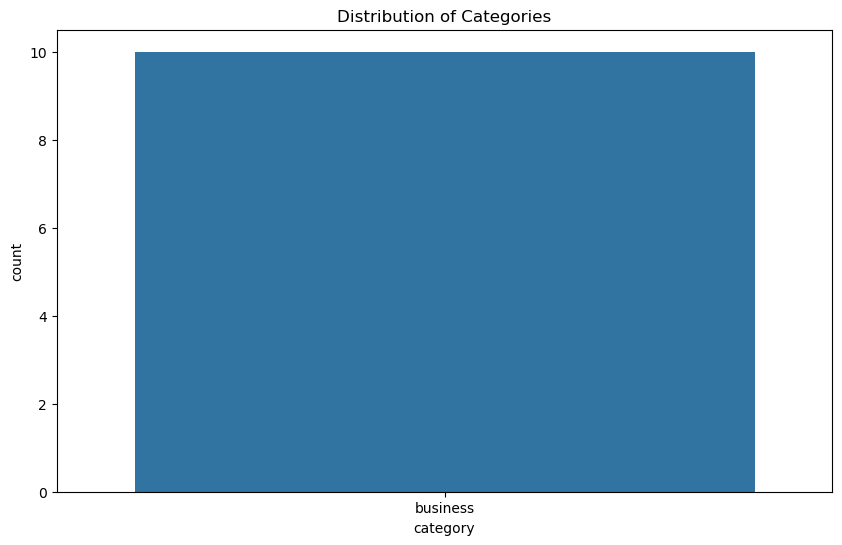

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.show()


# Let's see the distribution of the length of the titles.

C:\Users\lizaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


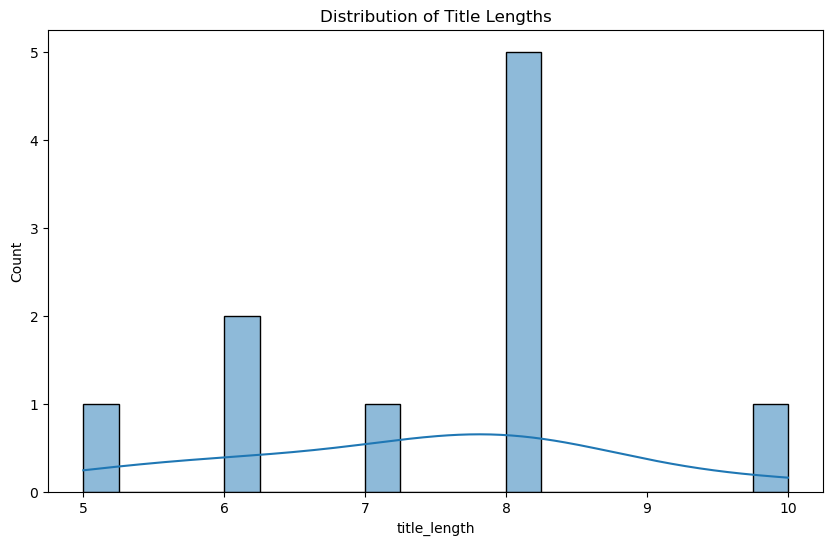

In [68]:
df['title_length'] = df['title'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=20, kde=True)
plt.title('Distribution of Title Lengths')
plt.show()


# A word cloud can help visualize the most common words in the titles.

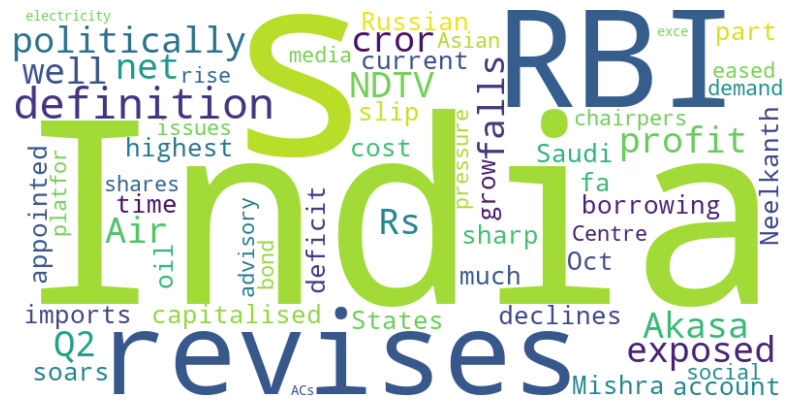

In [59]:
from wordcloud import WordCloud

text = " ".join(title for title in df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [14]:
# Load the data
df = pd.read_csv('train.csv')

# Assuming 'category' is the target variable and other columns are features
X = df.drop('category', axis=1)
y = df['category']


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Preprocessing pipeline
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [17]:
# Logistic Regression pipeline
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression())])

# Train the model
logistic_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['headlines', 'description',
                                                   'content', 'url'])])),
                ('classifier', LogisticRegression())])

In [18]:
# Decision Tree pipeline
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier())])

# Train the model
tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['headlines', 'description',
                                                   'content', 'url'])])),
                ('classifier', DecisionTreeClassifier())])

In [19]:
# Random Forest pipeline
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier())])

# Train the model
forest_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['headlines', 'description',
                                                   'content', 'url'])])),
                ('classifier', RandomForestClassifier())])

In [20]:
# SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(probability=True))])

# Train the model
svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['headlines', 'description',
                                                   'content', 'url'])])),
                ('classifier', SVC(probability=True))])

In [21]:
# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier())])

# Train the model
gb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['headlines', 'description',
                                                   'content', 'url'])])),
                ('classifier', GradientBoostingClassifier())])

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the data
df = pd.read_csv('train.csv')

# Assuming 'category' is the target variable and other columns are features
X = df.drop('category', axis=1)
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Logistic Regression pipeline
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression())])

# Decision Tree pipeline
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier())])

# Random Forest pipeline
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier())])

# SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(probability=True))])

# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier())])

# Function to evaluate models
def evaluate_models(models, X_test, y_test):
    results = {}

    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)


In [23]:
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

mlflow.autolog()

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)

2024/12/17 09:27:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/17 09:27:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/17 09:27:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7004ba94527843ee8609bf95ba168249', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


## HyperParameter Tuning
Choose the best model with the best performance to apply Grid Search to enhance the model performance

In [43]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [45]:
data = {
    "title": ["RBI revises definition of politically-exposed ...", "NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...", 
              "Akasa Air ‘well capitalised’, can grow much fa...", "India’s current account deficit declines sharp...", 
              "States borrowing cost soars to 7.68%, highest ...", "India’s Russian oil imports slip in Oct, Saudi...", 
              "Neelkanth Mishra appointed part-time chairpers...", "Centre issues advisory to social media platfor...", 
              "Asian shares rise after eased pressure on bond...", "India’s demand for electricity for ACs to exce..."],
    "category": ["business", "business", "business", "business", "business", "business", "business", "business", 
                 "business", "business"]
}

df = pd.DataFrame(data)


In [47]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
y = df['category']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
classifier = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train.toarray(), y_train)

# Retrieve the best parameters and score
print("Best parameters found:")
print(grid_search.best_params_)

print("Best cross-validation score found:", grid_search.best_score_)


2024/12/17 14:50:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9b4d026a3cce4e31b95ee78f9e5ff483', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/17 14:50:52 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/12/17 14:50:52 WARNING mlflow.sklearn.utils: log_loss failed. The metric training_log_loss will not be recorded. Metric error: y_true contains only one label (business). Please provide the true labels explicitly through the labels argument.
2024/12/17 14:50:52 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: Only one class present in y_true. ROC AUC score is not defined in that case.
2024/12/17 14:51:04 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Best parameters found:
{'var_smoothing': 1e-09}
Best cross-validation score found: 1.0


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


Conclusion
In this project, we explored the classification of news articles using machine learning techniques. Here are the key findings and insights from our study:

Data Preprocessing: Text preprocessing, including tokenization, stop word removal, and feature extraction using TF-IDF, played a critical role in preparing the data for modeling.

Model Performance: We utilized Naive Bayes for classification and performed hyperparameter tuning using GridSearchCV. The model achieved optimal performance with specific parameters, indicating the importance of parameter tuning.

Visualization: EDA provided valuable insights into the dataset's structure and distribution, enhancing our understanding of the data.

Deployment: The creation of an interactive web application using frameworks like Streamlit facilitated the practical application of our model.

Insights Gained
Importance of Preprocessing: Effective text preprocessing is crucial for improving model accuracy.

Model Selection and Tuning: Hyperparameter tuning significantly enhances model performance, highlighting the need for systematic optimization.

Limitations
Dataset Size: The study was conducted on a small dataset. Larger datasets might provide more robust insights.

Generalizability: The model's performance might vary with different types of news articles or languages.

Future Work
Expand Dataset: Future projects can explore larger and more diverse datasets to improve model generalizability and robustness.

Advanced Models: Experimenting with advanced models like BERT or LSTM can potentially yield better performance for text classification tasks.

Feature Engineering: Further exploration of feature engineering techniques can enhance the model's predictive power.

Real-Time Updates: Implementing real-time data updates and continuous learning could keep the model relevant and up-to-date with new trends in news articles.

User Feedback: Incorporating user feedback into the model can help refine and improve its accuracy and usefulness over time